In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# upload csv file
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
# load data set
df = pd.read_csv('spam.csv', encoding='latin-1')

# keep only necessary column
df = df[['v1' , 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


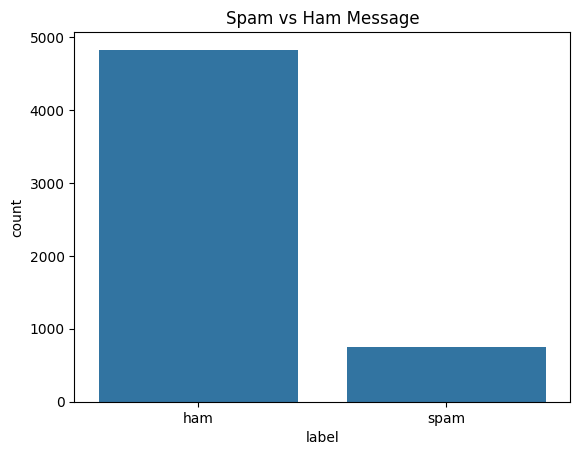

label
ham     4825
spam     747
Name: count, dtype: int64


In [5]:
# EDA
# message coount by type
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Message')
plt.show()

print(df['label'].value_counts())

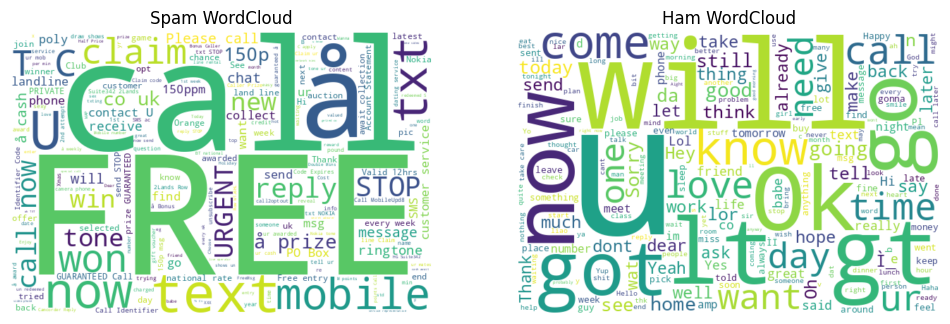

In [6]:
# wordCloud visualization
spam_words = ' '.join(df[df['label'] == 'spam']['message'])
ham_words = ' '.join(df[df['label'] == 'ham']['message'])

# WordClouds
spam_wc = WordCloud(width=600, height=400,background_color='white').generate(spam_words)
ham_wc = WordCloud(width=600, height=400,background_color='white').generate(ham_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham WordCloud')
plt.axis('off')

plt.show()

In [7]:
# Data preprocessing
#convert labels to binary (ham:0, spam:1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

#split feature and labels
X = df['message']
y = df['label_num']

In [8]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# split into training ans testing
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [9]:
# train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



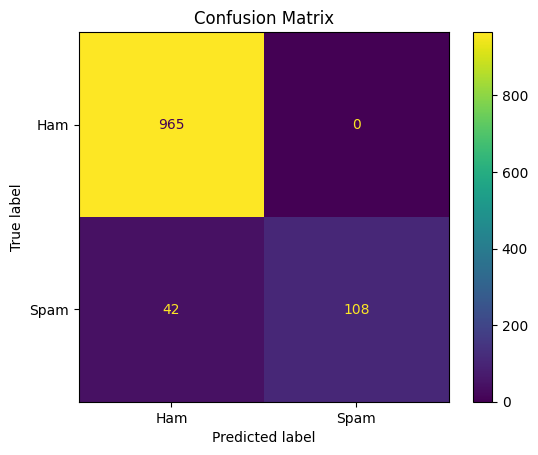

In [10]:
# make prediction
y_pred = model.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham','Spam'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Summary
print("Project Summary")
print("Model Used: Multinomial Naive Bayes")
print(f"Total Messages: {len(df)}")
print(f"Accuracy:{model.score(X_test,y_test) * 100:.2f}%")

Project Summary
Model Used: Multinomial Naive Bayes
Total Messages: 5572
Accuracy:96.23%
